In [4]:
from tqdm import trange, tqdm_notebook
from sklearn.datasets import fetch_20newsgroups
from time import sleep

categories = ['comp.graphics','sci.space']
for i in trange(4):
    sleep(0.01)
    
posts = fetch_20newsgroups(subset='train', categories=categories,
                           shuffle=True, random_state=42,
                           remove=('headers','footers','quotes'))

100%|██████████| 4/4 [00:00<00:00, 94.45it/s]


Done


In [5]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(lowercase=True, stop_words='english')
X = vectorizer.fit_transform(posts.data)

In [6]:
from sklearn.feature_selection import chi2
# compute chi2 for each feature
chi2score = chi2(X, posts.target)[0]

(array([ 0.53235333, 60.32462013,  1.96964587, ...,  0.98482293,
        1.96964587,  2.03082192]), array([4.65619150e-01, 8.04350110e-15, 1.60485456e-01, ...,
       3.21010995e-01, 1.60485456e-01, 1.54137230e-01]))


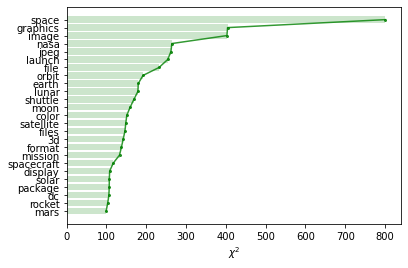

In [7]:
from pylab import barh, plot, yticks, show, grid, xlabel, figure
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-25:]))

x = range(len(topchi2[1]))
labels = topchi2[0]
barh(x , topchi2[1], align='center', alpha=.2, color='g')
plot(topchi2[1], x,'-o', markersize=2, alpha=.8, color='g')
yticks(x ,labels)
xlabel('$\chi^2$')
show()

In [27]:
# print(posts.data)
# print(posts.filenames)
print(posts.target_names)
print(posts.target)
# print(posts.DESCR)

['comp.graphics', 'sci.space']
[0 1 0 ... 0 0 1]
